# Exploring weather data
In this notebook we will check out the data we have to make a weather API.

First we will import 1 of the data files we have.

In [35]:
import pandas as pd

df = pd.read_csv("data-small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

Now that we imported the data we are gonna take a look at it.

In [36]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


## Show certain rows
Since this also functions as practice to learn pandas we will now use a couple of features inside pandas to see what we can do with it.

In [37]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


## Show certain columns
Now we look at specific columns

In [38]:
print("column names:", df.columns)
print("only the TG column: ", df['   TG'])

column names: Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')
only the TG column:  0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64


We can also show multiple columns.

In [39]:
df[["   TG", "    DATE"]]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


# Simple statistics
Now lets look at some of the statistics of the data. First lets look at the average temperature

In [40]:
df['   TG'].mean()

-991.1500649011311

Since the temperature is in celsius en shown as * 10 to prevent floats in the original data. The current average it shows would translate to -99.1 degrees celsius. Since that is clearly not accurate we need to see if something in the values is wrong. 

In the data views we did above here we already saw a few rows that had a value of -9999 in the TG column. This is a convention for when data is missing so we need to exclude that data from our view.

In [41]:
df.loc[df['   TG'] != -9999][['   TG']].mean() / 10

   TG    6.360788
dtype: float64

So for the station we are currently looking at the average temperature in celsius over all these years is 6.3.

Next we will use the max value which will return the highest temperature in the column. Since the data set shows the daily average temperature we will get the highest average measured on 1 of these days.

In [42]:
df.loc[df['   TG'] != -9999][['   TG']].max() / 10

   TG    26.2
dtype: float64

So 26.2 celsius is the highest daily average we had in all these days.

Now lets look at the lowest.

In [43]:
df.loc[df['   TG'] != -9999][['   TG']].min() / 10

   TG   -28.8
dtype: float64

Now we see -28.8 celsius is the lowest daily average we had in all these days.

Next we are going to make a histogram to see more info.

array([[<Axes: title={'center': '   TG'}>]], dtype=object)

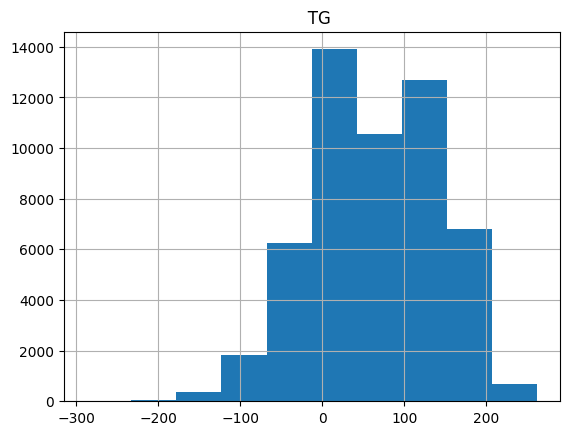

In [44]:
df.loc[df['   TG'] != -9999][['   TG']].hist()

In this histogram we see the most common temperature at this station is between -2 and 10 degrees celcius

## Get certain cells
Now we are looking at how to get certain cells in specific rows and columns

In [49]:
df.loc[df["    DATE"] == "1860-01-05"]["   TG"].squeeze() / 10

3.1

Now we are seeing how we get the date where the temperature was the highest.

In [50]:
df.loc[df["   TG"] == df["   TG"].max()]["    DATE"].squeeze()

Timestamp('1868-08-16 00:00:00')

## Calculate a new column out of existing column
Now ofcourse having to divide our temperature with 10 isn't something we want to do so we are going to create a new column.

In [55]:
df["TG"] = df["   TG"] / 10
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit
0,1,35381,1860-01-01,21,0,2.1,35.78
1,1,35381,1860-01-02,46,0,4.6,40.28
2,1,35381,1860-01-03,31,0,3.1,37.58
3,1,35381,1860-01-04,37,0,3.7,38.66
4,1,35381,1860-01-05,31,0,3.1,37.58
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,-1767.82
59317,1,35381,2022-05-28,-9999,9,-999.9,-1767.82
59318,1,35381,2022-05-29,-9999,9,-999.9,-1767.82
59319,1,35381,2022-05-30,-9999,9,-999.9,-1767.82


Lets also add Fahrenheit.

In [56]:
df["Fahrenheit"] = df["TG"] * (9/5) + 32
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit
0,1,35381,1860-01-01,21,0,2.1,35.78
1,1,35381,1860-01-02,46,0,4.6,40.28
2,1,35381,1860-01-03,31,0,3.1,37.58
3,1,35381,1860-01-04,37,0,3.7,38.66
4,1,35381,1860-01-05,31,0,3.1,37.58
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,-1767.82
59317,1,35381,2022-05-28,-9999,9,-999.9,-1767.82
59318,1,35381,2022-05-29,-9999,9,-999.9,-1767.82
59319,1,35381,2022-05-30,-9999,9,-999.9,-1767.82


Now ofcourse normally we would first remove the -9999 values.

However I think we know enough about pandas and notebook for now so we are going to end it here.